<a href="https://colab.research.google.com/github/rpasquini/econometria-iae/blob/main/Ejemplos_Regresion_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

# Modelo de Regresión Múltiple

Vamos a analizar la inclusión del sexo del respondiente al modelo donde explicamos el ingreso individual con la escolaridad



In [4]:
df=pd.read_csv('https://github.com/rpasquini/econometria-iae/blob/main/datos/eah2022_bu_ampliada_ind.txt?raw=true',sep=';')

In [5]:
df['ingreso']=df['ingtot_2']
df['logingreso']=np.where(df['ingtot_2']>0,np.log(df['ingtot_2']),np.nan)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
df=df.loc[df.aesc<20]


In [7]:
mod = smf.ols(formula='logingreso ~ aesc', data=df)

res = mod.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     2366.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:40:49   Log-Likelihood:                -10880.
No. Observations:                9062   AIC:                         2.176e+04
Df Residuals:                    9060   BIC:                         2.178e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9699      0.031    320.835      0.0

Text(0, 0.5, 'Log ingreso')

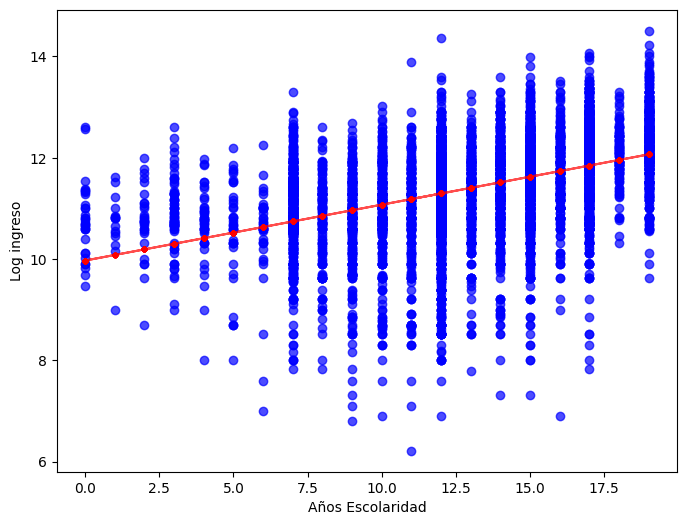

In [29]:
df2=df[['logingreso','aesc']].dropna() # Restrinjo el df a las observaciones usadas en la regresión
plt.figure(figsize=(8, 6)) #tamaño de la figura
plt.scatter(df2['aesc'], df2['logingreso'], color='blue', alpha=0.7, label='Data Points')
plt.plot(df2['aesc'], res.fittedvalues,  alpha=0.7, color= "red", marker='.', linestyle='-', label='Regression')
plt.xlabel('Años Escolaridad')
plt.ylabel('Log ingreso')

La pregunta del sexo está codificada como 1 "varón" 2 "mujer"

In [ ]:
df['sexo']

0        2
1        1
2        1
3        2
4        1
        ..
12496    2
12497    2
12498    2
12499    2
12500    2
Name: sexo, Length: 12432, dtype: int64

## Construcción de variable dummy

In [31]:
df['dsexo']=0
df.loc[df['sexo']==2,'dsexo']=1

In [ ]:
df[['sexo','dsexo']]

,sexo,dsexo
0,2,1
1,1,0
2,1,0
3,2,1
4,1,0
...,...,...
12496,2,1
12497,2,1
12498,2,1
12499,2,1


In [32]:
mod = smf.ols(formula='logingreso ~ dsexo', data=df)

res = mod.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     101.7
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           8.43e-24
Time:                        21:06:21   Log-Likelihood:                -11880.
No. Observations:                9062   AIC:                         2.376e+04
Df Residuals:                    9060   BIC:                         2.378e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5263      0.014    834.610      0.0

Text(0, 0.5, 'Log ingreso')

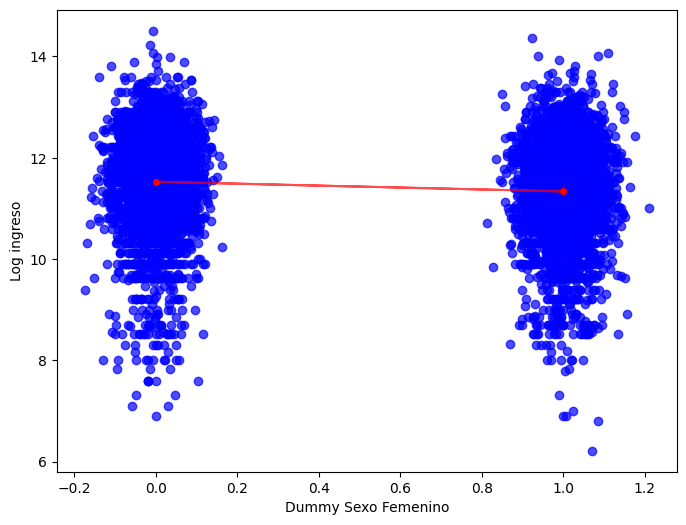

In [37]:
df2=df[['logingreso','dsexo']].dropna() # Restrinjo el df a las observaciones usadas en la regresión
df2['jittered_sexo']=df2['dsexo']+np.random.normal(0, 0.05, 9062)
plt.figure(figsize=(8, 6)) #tamaño de la figura
plt.scatter(df2['jittered_sexo'], df2['logingreso'], color='blue', alpha=0.7, label='Data Points')
plt.plot(df2['dsexo'], res.fittedvalues,  alpha=0.7, color= "red", marker='.', linestyle='-', label='Regression')
plt.xlabel('Dummy Sexo Femenino')
plt.ylabel('Log ingreso')

In [38]:
mod = smf.ols(formula='logingreso ~ aesc + dsexo', data=df)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1268.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:12:26   Log-Likelihood:                -10812.
No. Observations:                9062   AIC:                         2.163e+04
Df Residuals:                    9059   BIC:                         2.165e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0723      0.032    314.022      0.0

Interpretacion coeficiente $\beta_{aesc}$: Si comparamos a personas con el mismo sexo, personas con un año de escolaridad adicional presentan un incremento de 11.05% adicional.

Interpretacion coeficiente $\beta_{dsexo}$: Si comparamos a personas con el mismo ingreso, personas mujeres presentan un ingreso 19.56% inferior.


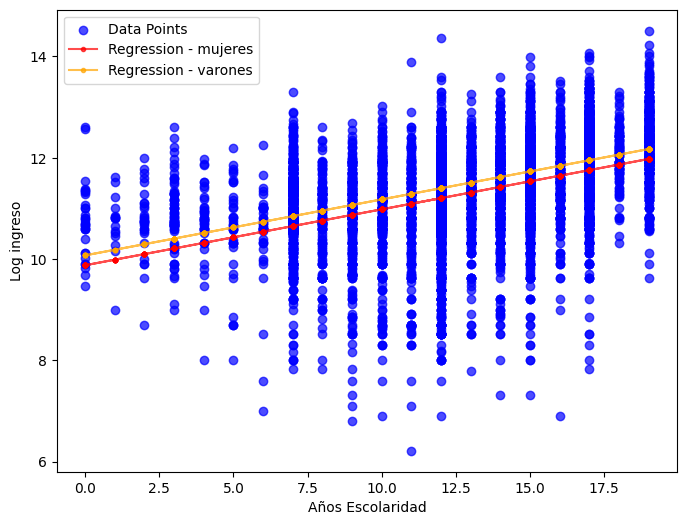

In [41]:
df2=df[['logingreso','aesc','dsexo']].dropna() # Restrinjo el df a las observaciones usadas en la regresión
df2['predicciones']=res.fittedvalues
dfmujeres=df2[df2['dsexo']==1]
dfvarones=df2[df2['dsexo']==0]
plt.figure(figsize=(8, 6)) #tamaño de la figura
plt.scatter(df2['aesc'], df2['logingreso'], color='blue', alpha=0.7, label='Data Points')
plt.plot(dfmujeres['aesc'], dfmujeres['predicciones'],  alpha=0.7, color= "red", marker='.', linestyle='-', label='Regression - mujeres')
plt.plot(dfvarones['aesc'], dfvarones['predicciones'],  alpha=0.7, color= "orange", marker='.', linestyle='-', label='Regression - varones')
plt.xlabel('Años Escolaridad')
plt.ylabel('Log ingreso')
plt.legend()

In [44]:
df2[['aesc','dsexo']].corr()

,aesc,dsexo
aesc,1.00000,0.00596
dsexo,0.00596,1.00000


Codificacion de pregunta m1 sobre lugar de nacimiento.
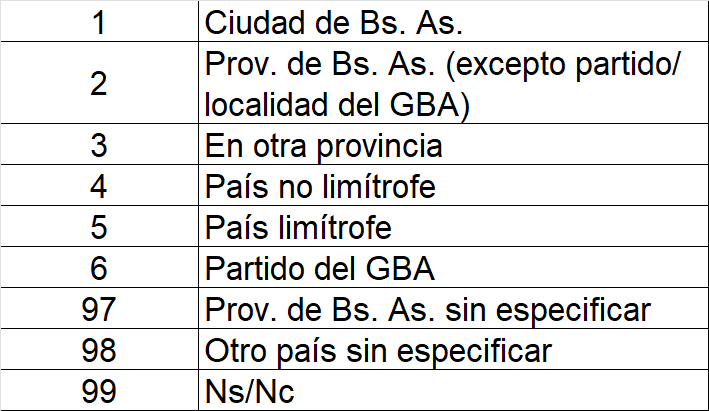

In [ ]:
df['dinmigrantelimit']=0
df.loc[df.m1==5,'dinmigrantelimit']=1

In [ ]:
mod = smf.ols(formula='logingreso ~ aesc + dinmigrantelimit', data=df)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             logingreso   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1211.
Date:                Tue, 24 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:02:23   Log-Likelihood:                -10858.
No. Observations:                9062   AIC:                         2.172e+04
Df Residuals:                    9059   BIC:                         2.174e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           10.0394      0.033  

In [ ]:
df.groupby('dinmigrantelimit')['logingreso','aesc'].count()

<ipython-input-27-3cc9305eaa70>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('dinmigrantelimit')['logingreso','aesc'].count()


,logingreso,aesc
dinmigrantelimit,,
0,8136,11345
1,926,1087


# Ejemplo OVB - Educación


In [ ]:
datosedu=pd.read_csv('https://raw.githubusercontent.com/rpasquini/urban-econometrics/master/data/estadistica-educativa.csv')

In [ ]:
dummiesgestion=pd.get_dummies(datosedu.tipo_gestion)

In [ ]:
datosedu=pd.concat([ datosedu, dummiesgestion],axis=1)

In [ ]:
mod = smf.ols(formula='iecep ~ Privada', data=datosedu)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  iecep   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     77.79
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           8.89e-17
Time:                        02:05:57   Log-Likelihood:                -487.24
No. Observations:                 308   AIC:                             978.5
Df Residuals:                     306   BIC:                             985.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2251      0.110     47.656      0.0

# Ejemplos Colinealidad


Ejemplo en datos de educacion


In [ ]:
mod = smf.ols(formula='tasa_repeticion_2012 ~ one_alto_mat', data=datosedu)

res = mod.fit()

print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     tasa_repeticion_2012   R-squared:                       0.179
Model:                              OLS   Adj. R-squared:                  0.177
Method:                   Least Squares   F-statistic:                     66.84
Date:                  Tue, 24 Oct 2023   Prob (F-statistic):           7.90e-15
Time:                          02:08:01   Log-Likelihood:                -1119.3
No. Observations:                   308   AIC:                             2243.
Df Residuals:                       306   BIC:                             2250.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       15.2180     

In [ ]:
mod = smf.ols(formula='tasa_repeticion_2012 ~ one_alto_cs_nat', data=datosedu)

res = mod.fit()

print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     tasa_repeticion_2012   R-squared:                       0.179
Model:                              OLS   Adj. R-squared:                  0.177
Method:                   Least Squares   F-statistic:                     66.93
Date:                  Tue, 24 Oct 2023   Prob (F-statistic):           7.61e-15
Time:                          02:08:20   Log-Likelihood:                -1119.2
No. Observations:                   308   AIC:                             2242.
Df Residuals:                       306   BIC:                             2250.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          15.

In [ ]:
mod = smf.ols(formula='tasa_repeticion_2012 ~ one_alto_mat + one_alto_cs_nat + one_alto_cs_soc', data=datosedu)

res = mod.fit()

print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     tasa_repeticion_2012   R-squared:                       0.228
Model:                              OLS   Adj. R-squared:                  0.220
Method:                   Least Squares   F-statistic:                     29.89
Date:                  Tue, 24 Oct 2023   Prob (F-statistic):           5.80e-17
Time:                          02:09:02   Log-Likelihood:                -1109.9
No. Observations:                   308   AIC:                             2228.
Df Residuals:                       304   BIC:                             2243.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          17.